<a href="https://colab.research.google.com/github/RakeshBhugra/Network-on-Chip-Temperature-Prediction/blob/main/AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc3

In [ ]:
!pip install autokeras

In [ ]:
!sudo pip show autokeras

Name: autokeras
Version: 1.0.11
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: Data Analytics at Texas A&M (DATA) Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, tensorflow, scikit-learn, packaging
Required-by: 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from autokeras import StructuredDataRegressor

In [ ]:
 data = pd.read_excel('drive/MyDrive/NoC/data.xlsx')
data.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head()

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Application_name,Simulation_Time,r0_a,r1_a,r2_a,r3_a,r4_a,r5_a,r6_a,r7_a,r8_a,r9_a,r10_a,r11_a,r12_a,r13_a,r14_a,r15_a,r0_ss,r1_ss,r2_ss,r3_ss,r4_ss,r5_ss,...,r13_ds,r14_ds,r15_ds,buffer,clean,total_received_packets,Total_received_Header_flit,Total_received_flits,Global_average_delay,Max_delay,Avg_waiting_time_in_each_buffer,Global_average_throughput,Throughput,Total_energy,Cores_energy,Routers_energy,Avg_power,Avg_cores_power,Avg_routers_power,Avg_power_per_router,Static_power,Avg_dynamic_power,Total_Area,Layer_Area,Area_per_core,Area_per_Router,Crossbar,VCAllocator,SWAllocator,Buffers,Layer_average_delay_(cycles),Layer_energy_(J),Layer_Routed_flits,Layer_Routed_flits_0,Layer_Routed_flits_1,Layer_Routed_flits_2,Layer_Routed_flits_3,Layer_Routed_flits_4,Layer_Routed_flits_5,Layer_Routed_flits_6
0,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,100000,26983,115318,80069,71629,28898,58370,43846,52525,0,684,13889,52525,0,0,32,52525,59.1910,59.1968,59.7050,64.0252,59.3089,59.3711,...,27.3685,26.8208,26.6948,4,5000,26226,26224,157790,Max,389,44.4691,0.412345,0.263510,0.002614,0.002147,0.000467,2.613700e-08,2.147120e-08,4.665800e-09,2.916120e-10,1.477040e-10,1.439080e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.480,0.000467,597293,155829,74256,26180,182955,0,0,158073
1,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,150000,2704,12122,8434,7522,3077,6223,4628,5490,0,47,1407,5491,0,0,6,5491,59.1905,59.1964,59.7050,64.0244,59.3081,59.3659,...,27.4154,26.8584,26.7304,4,5000,40032,40030,240715,Max,409,44.4117,0.399054,0.267818,0.003930,0.003232,0.000698,2.619690e-08,2.154680e-08,4.650030e-09,2.906270e-10,1.447990e-10,1.458280e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.238,0.000698,910689,237587,113976,39076,278994,0,0,241056
2,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,200000,53461,230562,160284,143422,58191,116982,88035,104887,0,1092,27535,104887,0,0,57,104887,59.0712,59.0878,59.5949,63.9127,59.1885,59.2548,...,29.1429,28.1872,27.9162,4,5000,52552,52550,315932,Max,445,44.3671,0.402221,0.263540,0.005214,0.004294,0.000919,2.606790e-08,2.147230e-08,4.595580e-09,2.872240e-10,1.433450e-10,1.438790e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.163,0.000919,1194282,310860,149506,51819,365866,0,0,316231
3,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,250000,2891,12022,8294,7548,2943,5830,4420,5524,0,71,1393,5519,0,0,0,5519,59.0697,59.0865,59.5952,63.9200,59.1859,59.2474,...,29.2049,28.2335,27.9577,4,5000,66400,66399,398360,Max,438,44.3600,0.396105,0.265786,0.006528,0.005378,0.001150,2.611020e-08,2.151140e-08,4.598770e-09,2.874230e-10,1.424900e-10,1.449330e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,183.066,0.001150,1506338,392359,188705,64493,462082,0,0,398699
4,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,mpeg_ilp,300000,81014,346103,240823,215495,86716,173973,131661,157340,0,1587,41388,157340,0,0,84,157340,59.0311,59.0514,59.5590,63.8786,59.1479,59.2171,...,30.6874,29.3985,28.9481,4,5000,78924,78923,473820,Max,436,44.3202,0.398757,0.263409,0.007813,0.006441,0.001372,2.604230e-08,2.147010e-08,4.572190e-09,2.857620e-10,1.419200e-10,1.438420e-10,35435000.0,35435000.0,4695230.0,158451,147760,0,333.866,10357.2,182.939,0.001372,1790864,466497,224747,76392,549105,0,0,474123


In [ ]:
X, y = data["r0-core r1-core r2-core r3-core r4-core r5-core r6-core r7-core r8-core r9-core r10-core r11-core r12-core r13-core r14-core r15-core Simulation_Time".split()], data['r0_ss']

In [ ]:
X

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Simulation_Time
0,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,100000
1,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,150000
2,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,200000
3,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,250000
4,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,350000
1016,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,400000
1017,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,450000
1018,6,11,8,4,-1,-1,7,0,9,-1,1,10,5,-1,2,3,500000


In [ ]:
y

0       59.1910
1       59.1905
2       59.0712
3       59.0697
4       59.0311
         ...   
1015    60.6388
1016    60.6580
1017    60.6473
1018    60.6087
1019    60.6400
Name: r0_ss, Length: 1020, dtype: float64

In [ ]:
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

(1020, 17) (1020,)


In [ ]:
search = StructuredDataRegressor(max_trials=15, loss='mean_squared_error')

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_regressor/oracle.json


In [ ]:
search.fit(x=X_train, y=y_train, verbose=1)

Trial 15 Complete [00h 01m 57s]
val_loss: 0.009050043299794197

Best val_loss So Far: 0.009050043299794197
Total elapsed time: 00h 14m 18s
INFO:tensorflow:Oracle triggered exit
Epoch 1/756
22/22 [==============================] - 0s 2ms/step - loss: 1268.2169 - mean_squared_error: 1268.2169
Epoch 2/756
22/22 [==============================] - 0s 2ms/step - loss: 16.1845 - mean_squared_error: 16.1845
Epoch 3/756
22/22 [==============================] - 0s 1ms/step - loss: 10.2860 - mean_squared_error: 10.2860
Epoch 4/756
22/22 [==============================] - 0s 1ms/step - loss: 7.3594 - mean_squared_error: 7.3594
Epoch 5/756
22/22 [==============================] - 0s 1ms/step - loss: 5.6159 - mean_squared_error: 5.6159
Epoch 6/756
22/22 [==============================] - 0s 1ms/step - loss: 4.4288 - mean_squared_error: 4.4288
Epoch 7/756
22/22 [==============================] - 0s 2ms/step - loss: 3.5777 - mean_squared_error: 3.5777
Epoch 8/756
22/22 [==============================]

In [ ]:
mse, _ = search.evaluate(X_test, y_test, verbose=1)

11/11 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098


In [ ]:
mse

0.009837581776082516

In [ ]:
X_test[:1]

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Simulation_Time
267,1,9,-1,5,-1,3,11,-1,2,0,10,7,4,8,-1,6,450000


In [ ]:
yhat = search.predict(X_test[:1])
print('Predicted: %.3f' % yhat[0])

Predicted: 66.946


Real value is 66.9292

In [ ]:
model = search.export_model()

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 17)                0         
_________________________________________________________________
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense (Dense)                (None, 32)                576       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)               

In [ ]:
model.save('drive/MyDrive/NoC')

INFO:tensorflow:Assets written to: drive/MyDrive/NoC/assets


In [ ]:
model.save_weights('drive/MyDrive/NoC/k.h5_weights')

In [ ]:
y_test

267    66.9292
142    59.2656
839    64.5655
175    61.7080
481    59.2197
        ...   
0      59.1910
963    58.8278
772    61.1844
684    59.0280
66     60.8932
Name: r0_ss, Length: 337, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
 l = []
# n = X_test.size
for i in range(337):
  yhat = search.predict(X_test[i:i+1])
  l.append(yhat[0])

In [ ]:
X_test.size

5729

In [ ]:
print(l)

[array([66.945816], dtype=float32), array([59.29747], dtype=float32), array([64.60894], dtype=float32), array([61.706398], dtype=float32), array([59.07815], dtype=float32), array([59.521313], dtype=float32), array([62.779392], dtype=float32), array([66.751114], dtype=float32), array([60.66519], dtype=float32), array([60.77307], dtype=float32), array([59.93577], dtype=float32), array([60.01272], dtype=float32), array([64.62051], dtype=float32), array([60.98193], dtype=float32), array([59.067947], dtype=float32), array([63.57969], dtype=float32), array([58.796024], dtype=float32), array([59.141853], dtype=float32), array([59.26023], dtype=float32), array([60.474884], dtype=float32), array([62.04287], dtype=float32), array([62.45075], dtype=float32), array([60.6106], dtype=float32), array([60.33707], dtype=float32), array([60.17257], dtype=float32), array([65.29335], dtype=float32), array([65.14513], dtype=float32), array([66.64122], dtype=float32), array([59.440483], dtype=float32), arra

In [ ]:
X_test

,r0-core,r1-core,r2-core,r3-core,r4-core,r5-core,r6-core,r7-core,r8-core,r9-core,r10-core,r11-core,r12-core,r13-core,r14-core,r15-core,Simulation_Time
267,1,9,-1,5,-1,3,11,-1,2,0,10,7,4,8,-1,6,450000
142,2,6,-1,7,9,10,1,4,3,0,-1,-1,-1,8,5,11,200000
839,1,-1,0,8,10,2,4,-1,9,11,5,-1,3,6,7,-1,550000
175,-1,8,10,4,3,11,-1,0,1,6,-1,5,2,9,7,-1,350000
481,-1,10,0,4,3,6,-1,1,2,-1,7,-1,11,8,5,9,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,0,-1,-1,3,4,9,-1,2,10,6,7,5,8,11,-1,100000
963,1,8,9,0,5,-1,4,-1,2,3,10,11,-1,7,-1,6,250000
772,6,11,-1,8,0,10,-1,-1,-1,1,9,4,5,7,3,2,200000
684,2,0,11,-1,5,7,9,1,3,8,-1,-1,-1,10,4,6,300000


In [ ]:
print(X_test[0:1])

     r0-core  r1-core  r2-core  ...  r14-core  r15-core  Simulation_Time
267        1        9       -1  ...        -1         6           450000

[1 rows x 17 columns]


In [ ]:
len(l)

337

In [ ]:
len(y_test)

337

In [ ]:
l2=[]
for i in y_test:
  l2.append(i)

In [ ]:
l1 = []
for i in range(len(l)):
  l1.append(l[i][0])

In [ ]:
c=0
for i in range(len(l2)):
  print(l1[i], l2[i])
  c+=1

66.945816 66.9292
59.29747 59.2656
64.60894 64.5655
61.706398 61.708
59.07815 59.2197
59.521313 59.6493
62.779392 62.7914
66.751114 66.7322
60.66519 60.7286
60.77307 60.8703
59.93577 59.8303
60.01272 60.2315
64.62051 64.5874
60.98193 60.9846
59.067947 58.9415
63.57969 63.6472
58.796024 58.7773
59.141853 59.0126
59.26023 59.2257
60.474884 60.3932
62.04287 62.0015
62.45075 62.4736
60.6106 60.6963
60.33707 60.3146
60.17257 60.3709
65.29335 65.4864
65.14513 65.1476
66.64122 66.676
59.440483 59.4746
60.797077 60.988
59.756947 59.7648
59.31854 59.2764
60.541653 60.5982
61.139553 61.1175
59.520966 59.6752
59.464508 59.5188
60.64253 60.5806
59.100624 59.0349
59.172997 59.0215
59.348698 59.3083
62.98511 62.994
59.32163 59.1126
60.105766 60.29
60.715145 60.7846
60.98705 60.9931
59.52045 59.5607
59.54173 59.4905
60.91197 61.1004
59.126408 59.0181
60.75832 60.6653
61.305656 61.1636
60.044796 60.0382
61.86444 61.8975
60.01298 60.0525
59.587364 59.5658
60.56205 60.5653
60.8015 60.6676
59.979397 59.9

<Figure size 432x288 with 0 Axes>

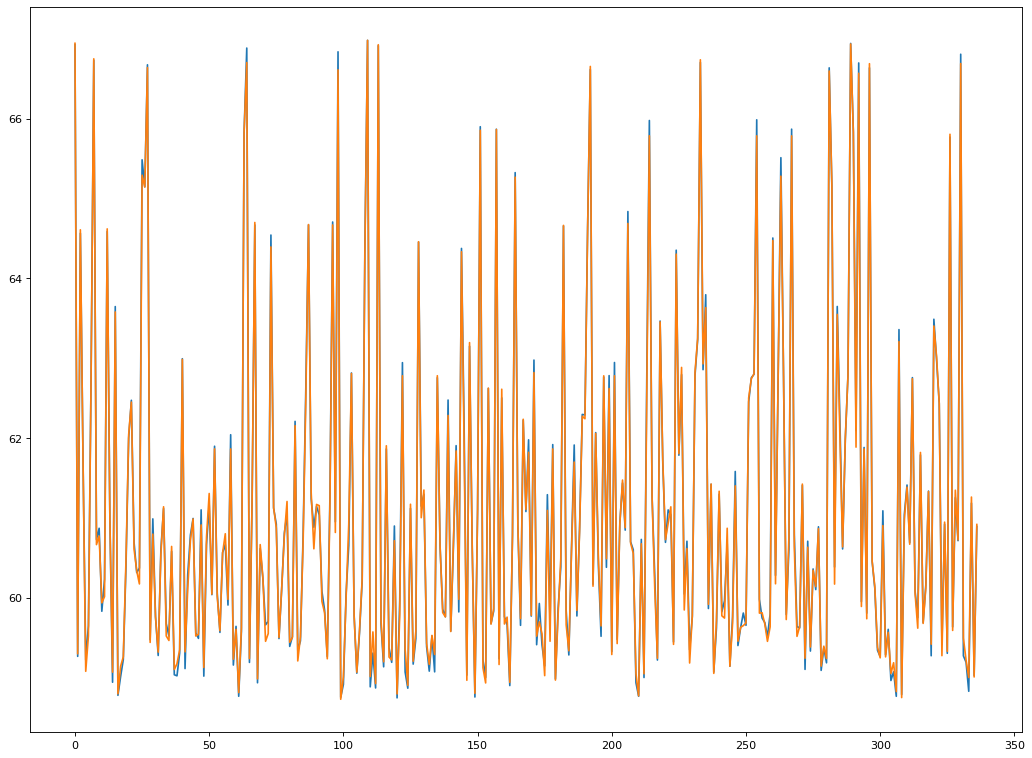

In [ ]:
fig = plt.gcf()
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(l)
plt.plot(l2)
plt.plot(l1)

In [ ]:
l3 = []
c=0
for i in range(len(l2)):
  l3.append(l1[c]-l2[c])
  c+=1

<Figure size 432x288 with 0 Axes>

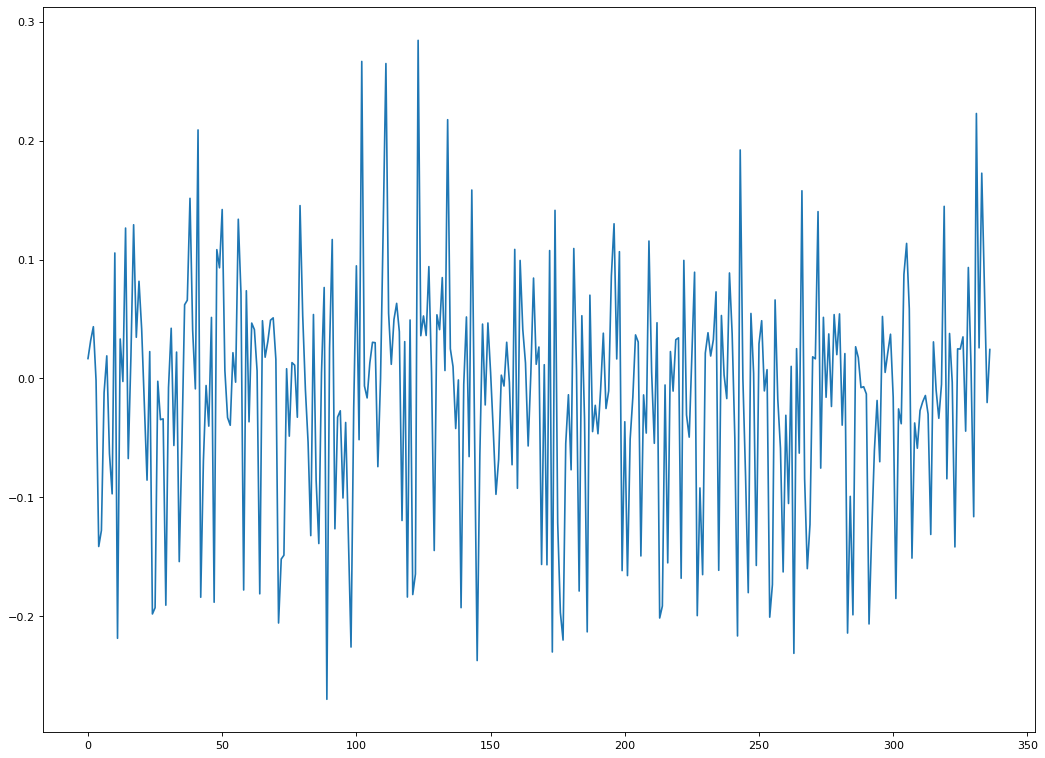

In [ ]:
fig = plt.gcf()
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(l)
plt.plot(l3)

Plot of the difference

In [ ]:
import timeit
start_time = timeit.default_timer()
k = search.predict(X_test[0:1])
elapsed = timeit.default_timer() - start_time

In [ ]:
print(elapsed)

1.6177140290001262


In [ ]:
import timeit
start_time = timeit.default_timer()
k = search.predict(X_test[1:2])
elapsed = timeit.default_timer() - start_time

In [ ]:
print(elapsed)

1.6012006419987301
